# Catherine Nguyen
Stat 196k
updated: 03/08/2021

## Questions

### 1
(3 pts)

1. Why is it better to take a simple random sample, instead of just the first k rows?

*  Taking random samples from a large group or population is better than the first k rows because it helps keep the data sampled from being biased. Imagine surveying people from city to city. If you had taken all samples from the first row then that would be equavalent to only testing the samples from one city. Making it skewed towards that city alone. So randomly sampling gives us a better representation of the whole population. With that said, its not always true that the random samples will be unbiased.

2. Suppose we halt reservoir sampling at element m, with m < n, where n is the size of the entire stream.
    Can this be a sample of the entire data?
    Explain.

* No, because m is less than n so its not possible to sample the entire data. Although, there are no limits to the value of m other than its less than n. So it is possible to sample all the data in n but one. For example, if n=100 and m=99, you would samples 99 out of the 100. 

3. I [read on the internet](https://unix.stackexchange.com/a/108604/456485) that `shuf -n 100 data.txt` uses reservoir sampling.
The following commands each produce 100 lines from `data.txt`.
For each command, will it produce a simple random sample of the lines of the file `data.txt`?
Why or why not?
```
head -n 100 data.txt | shuf         # 1
shuf -n 100 data.txt | head -n 100  # 2
shuf -n 200 data.txt | head -n 100  # 3
shuf -n 100 data.txt | head -n 100  | sort  # 4
```

* #1 - will not produce a random sample of the lines because what it really does is take the first 100 rows from data.txt then it will shuffle them. So really you're just sampling the first 100 rows which is not what we want.
* #2 - will produce a random sample of the lines because it first returns a shuffled/random 100 rows from data.txt then it will return the top 100 rows which have already been shuffled. So all head does is regurgitate the lines from shuf.
* #3 - will produce a random sample of the lines because it shuffles/randomly samples 200 rows from data.txt then head takes the top 100 rows from the results of shuf.
* #4 - will produce a random sample of lines because it randomly samples 100 rows from data.txt then head returns those same 100 lines then sort will sort then in ascending order. 

### 2
(10 pts)

Implement reservoir sampling by writing a program in Julia called `shuf.jl` that works like a simple version of `shuf`.
It should accept one positional argument with the number of elements to sample, and default to 100.

Verify that it works for the following cases:

catherine nguyen

edited: march 8th, 2021

using Random

    function reservSample(stream=stdin, size=100)
        if isempty(ARGS)
            sampleSize = size
        else    
            sampleSize = parse(Int, ARGS[1])
        end
        # populate resevoir array
        reservoir = fill("", sampleSize)
        count = 1
        for element in eachline(stream)
            if count <= sampleSize
                reservoir[count] = element
            else
                randIndex = rand(1:count)
                if randIndex <= sampleSize
                    reservoir[randIndex] = element
                end
            end
            count += 1
        end
        # println(reservoir) # reservoir array tester

        # fill sample
        realCount = count - 1
        if realCount < sampleSize
            sample = fill("", realCount)
            for element in 1:realCount
                sample[element] = reservoir[element]
            end
            # println(sample) # sample array tester
            shuf(sample)
        else
            shuf(reservoir)
        end
    end

    function shuf(r)
        res = Random.shuffle(r)
        for element in 1:length(res)
            println(res[element])
        end 
    end

    function main()
        R = reservSample()
    end

    if abspath(PROGRAM_FILE) == @__FILE__
        main()
    end

Above is my code and below I will provide screenshots of the results of the following test cases. 

1. `seq 10 | julia shuf.jl` shuffles the integers from 1 to 10.

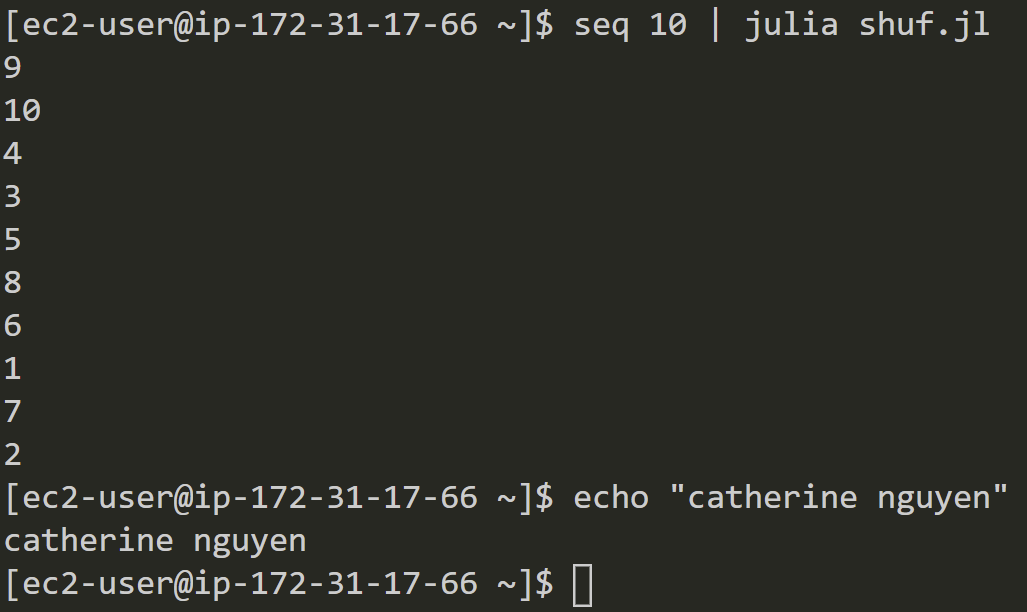

In [1]:
from IPython import display 
display.Image("one.PNG")

2. `seq 10 | shuf | julia shuf.jl` shuffles the integers from 1 to 10.

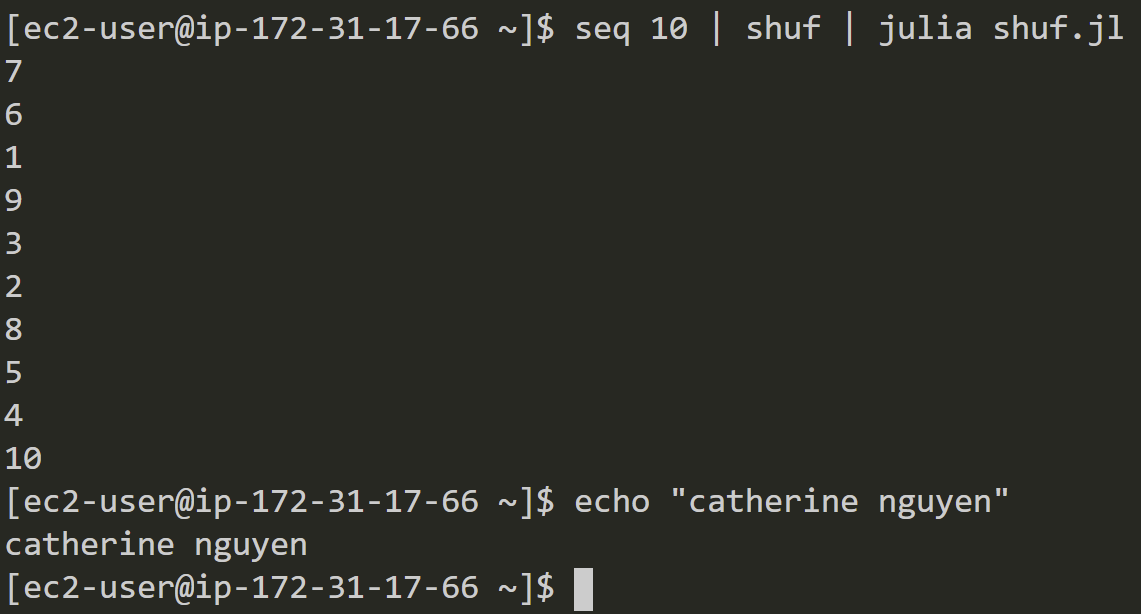

In [4]:
display.Image("two.PNG")

3. `seq 100 | julia shuf.jl 20` samples 20 random integers without replacement from 1 to 100.

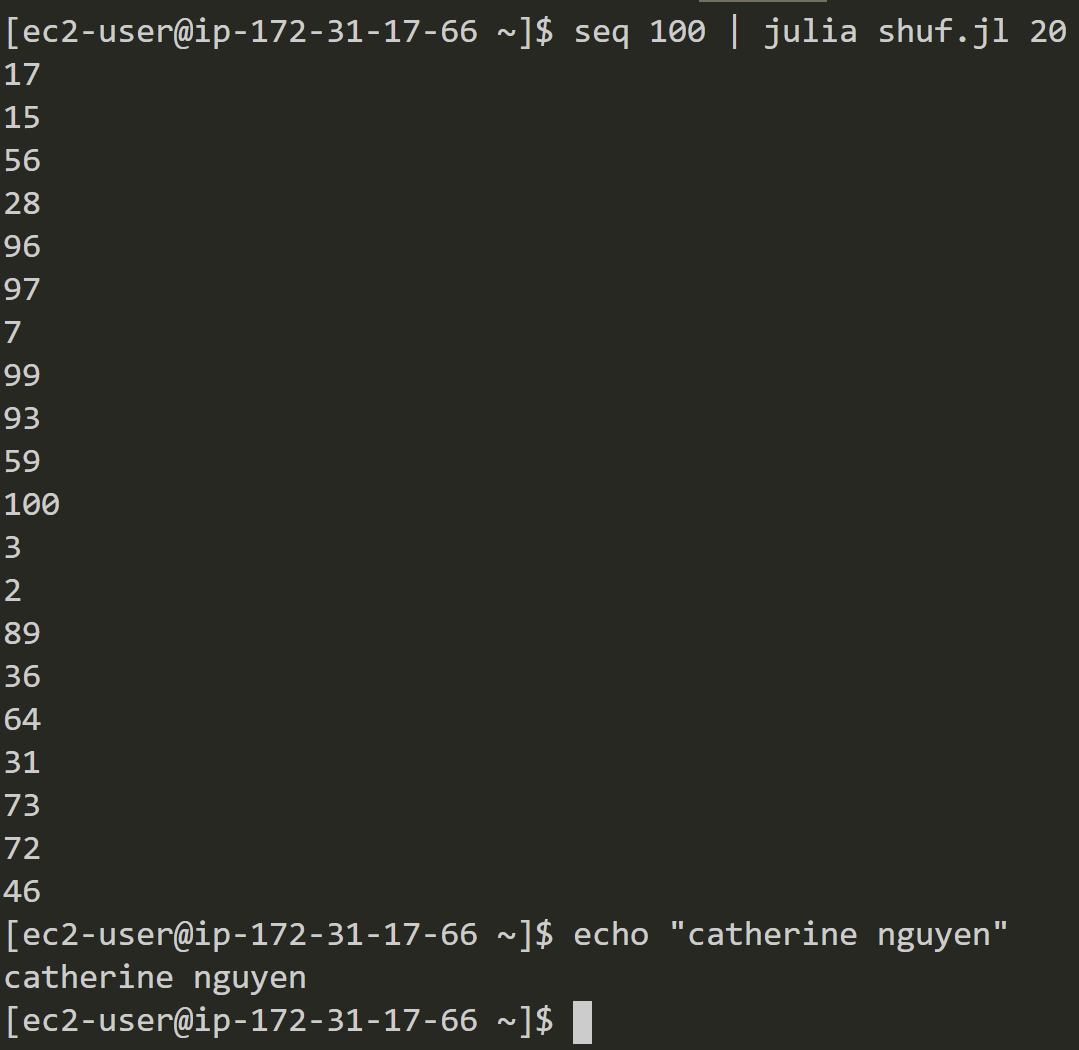

In [5]:
display.Image("three.PNG")

4. `seq 1000 | julia shuf.jl` samples 100 random integers without replacement from 1 to 1000.

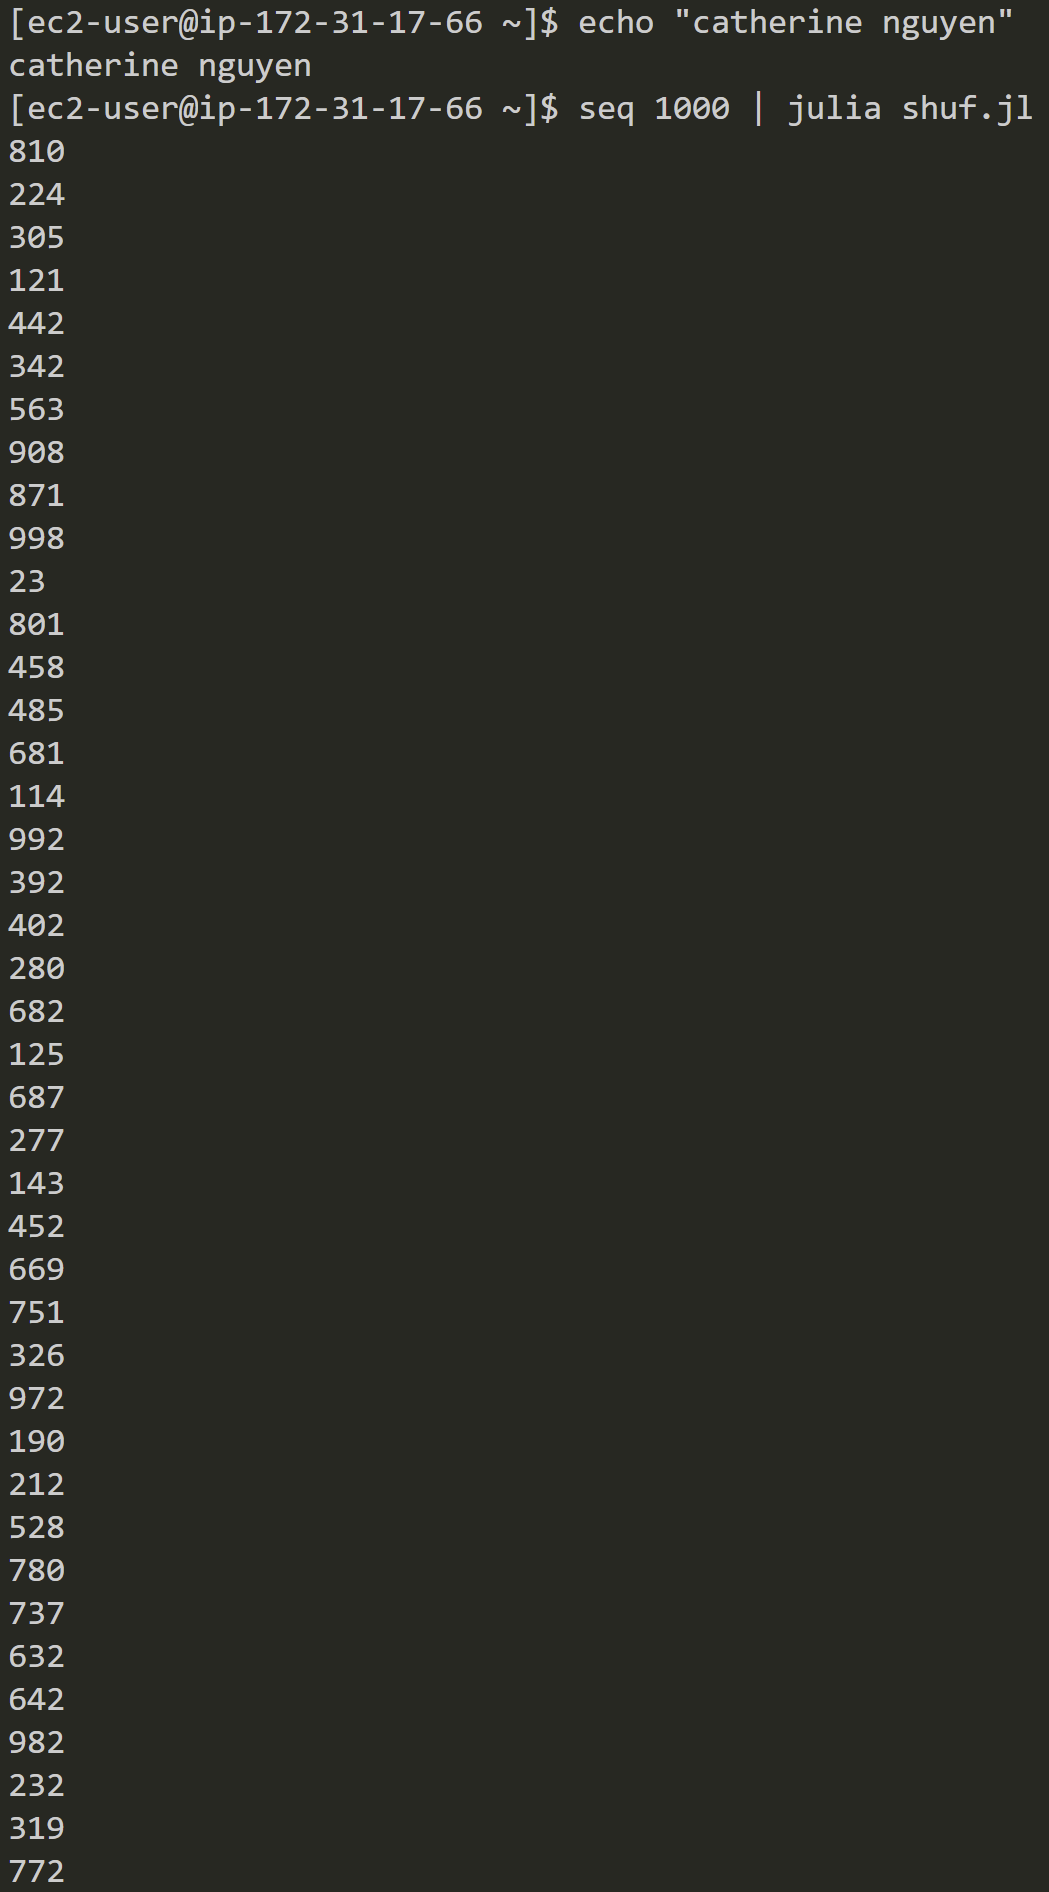

In [8]:
#cant fit it all in screen and i didnt want to upload multiple photos
display.Image("four.PNG")

5. `time seq 1e9 | julia shuf.jl` samples 100 integers from 1 to 1 billion

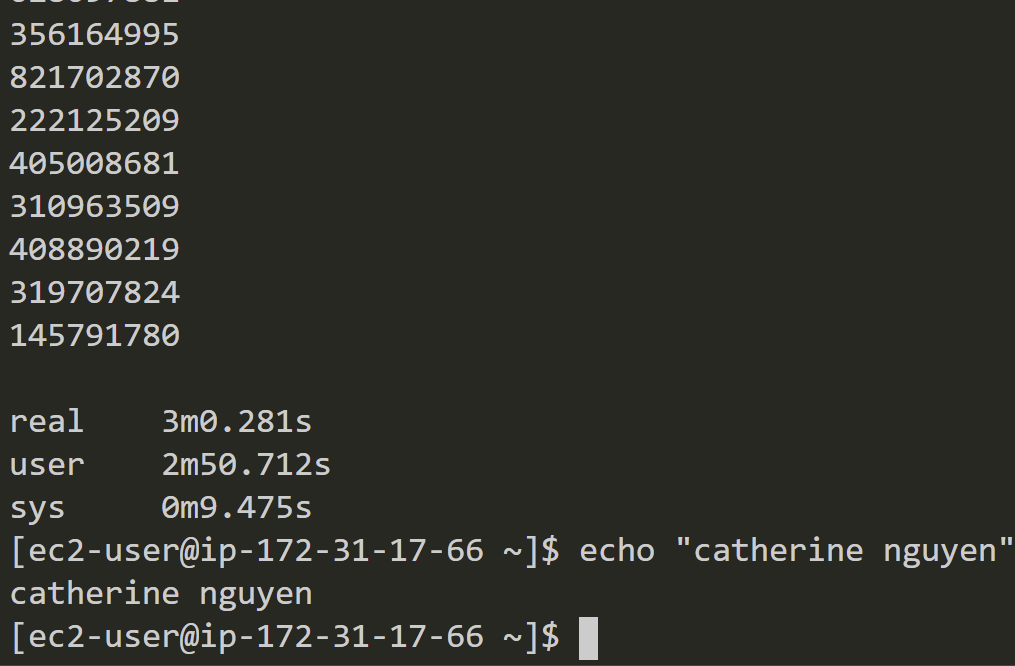

In [20]:
#for this I wanted to emphasize on the time because 100 ints would require more pics
display.Image("five.PNG")

6. `seq 20 | sed "s/1/one/" | julia shuf.jl` shuffles non integer input lines

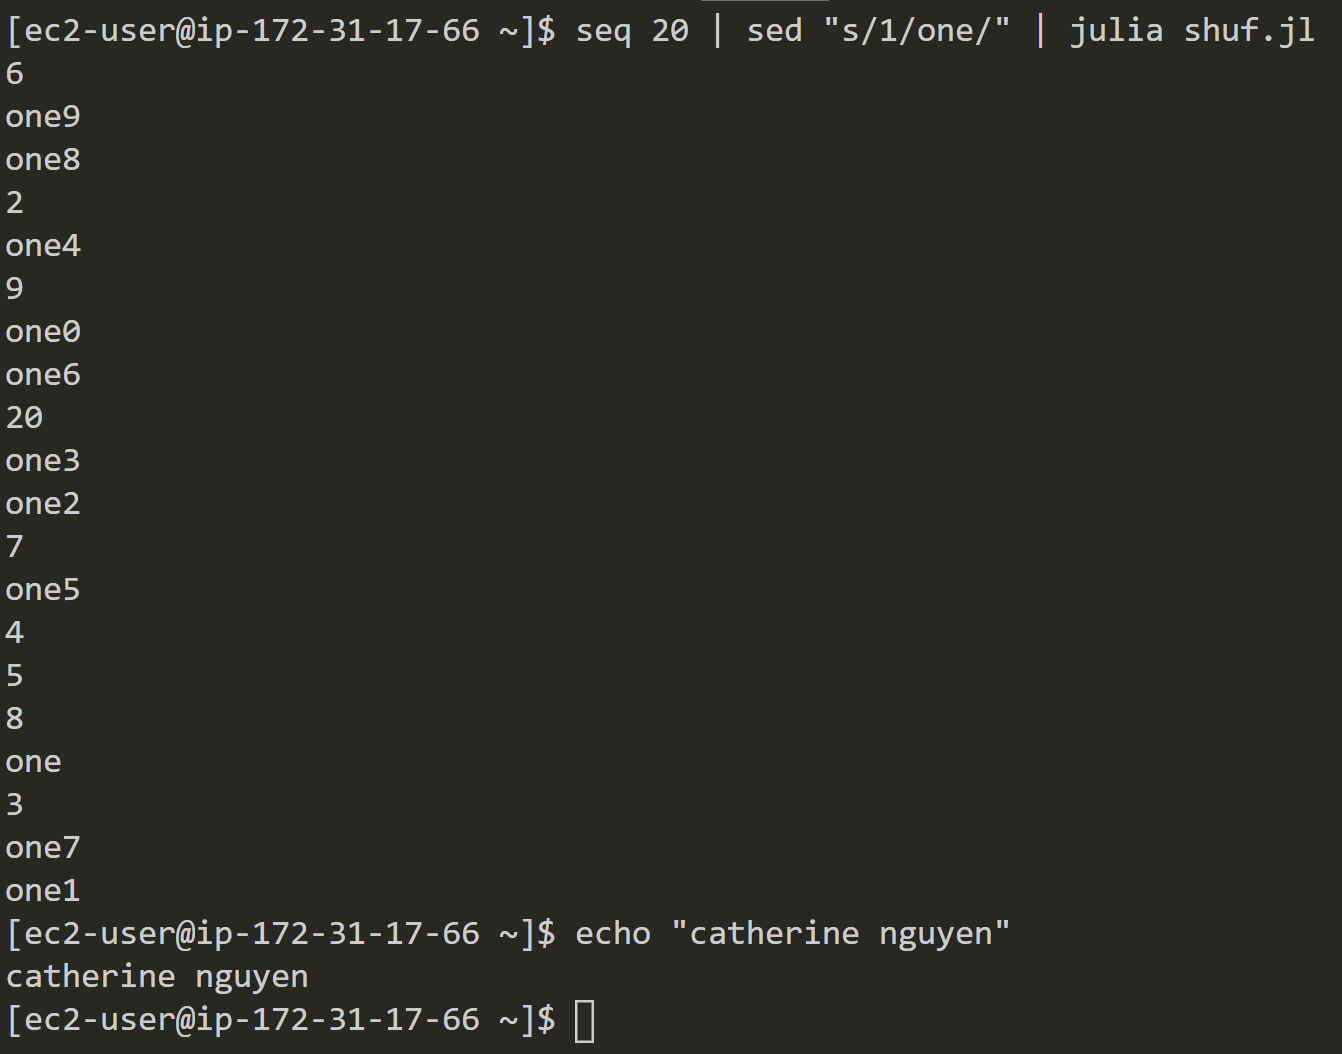

In [10]:
display.Image("six.PNG")

7. `seq 10 | julia shuf.jl 10` shuffles the integers from 1 to 10

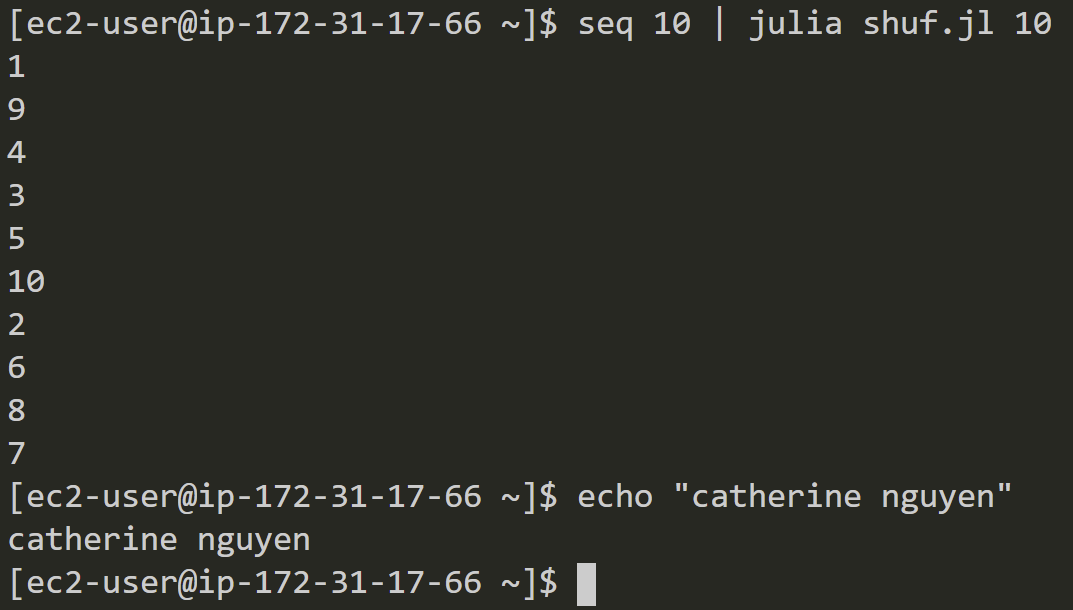

In [12]:
display.Image("seven.PNG")

8. `seq 11 | julia shuf.jl 10` samples and shuffles 10 integers without replacement from 1 to 11.

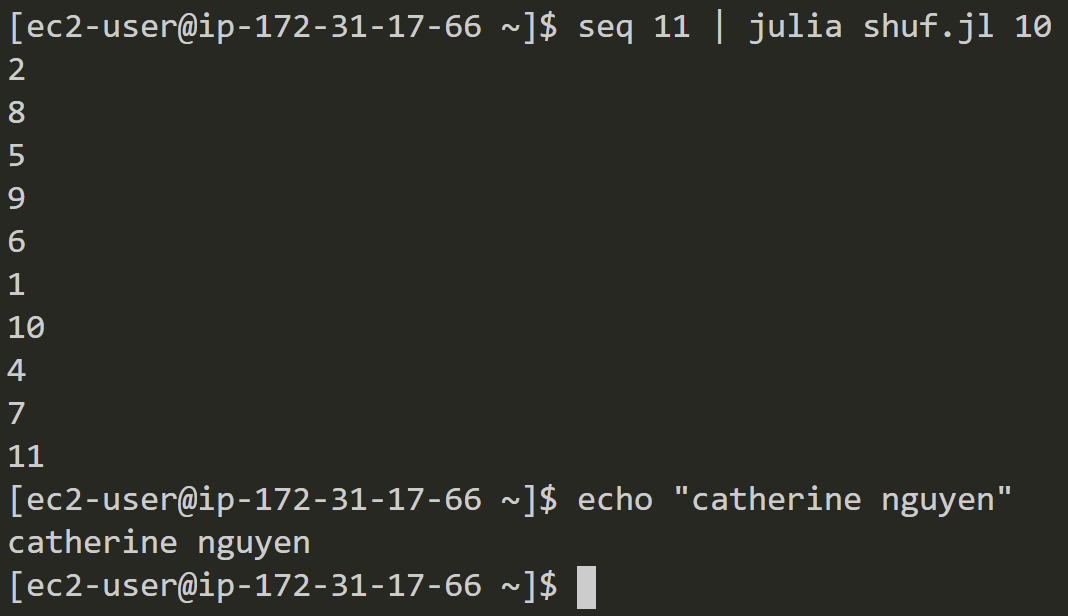

In [13]:
display.Image("eight.PNG")

### 3 - Testing
(7 pts)



_Note: I will explain this step further in subsequent classes.__

Use the Chi Square test or Kolmogorov Smirnov test together with seq to check if your implementation of reservoir sampling differs from the uniform distribution on the integers 1 to n. Describe how you designed the test, state the null hypothesis, show your calculations, and explain your conclusion.

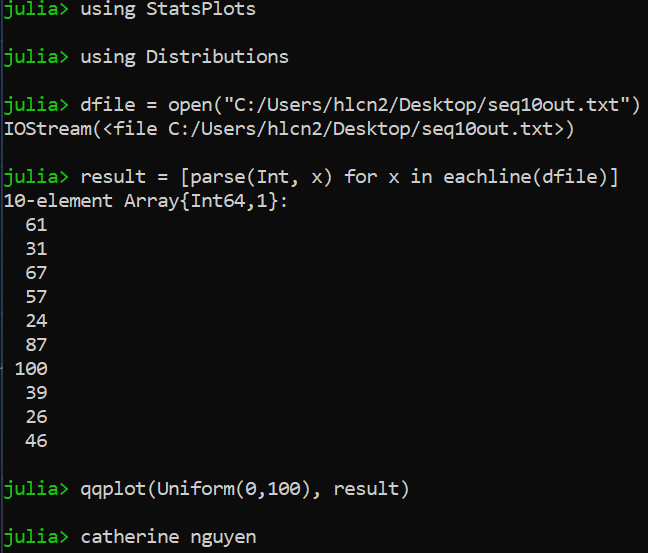

In [15]:
#by running the following code I was able to get this plot. 
display.Image("julia.PNG")

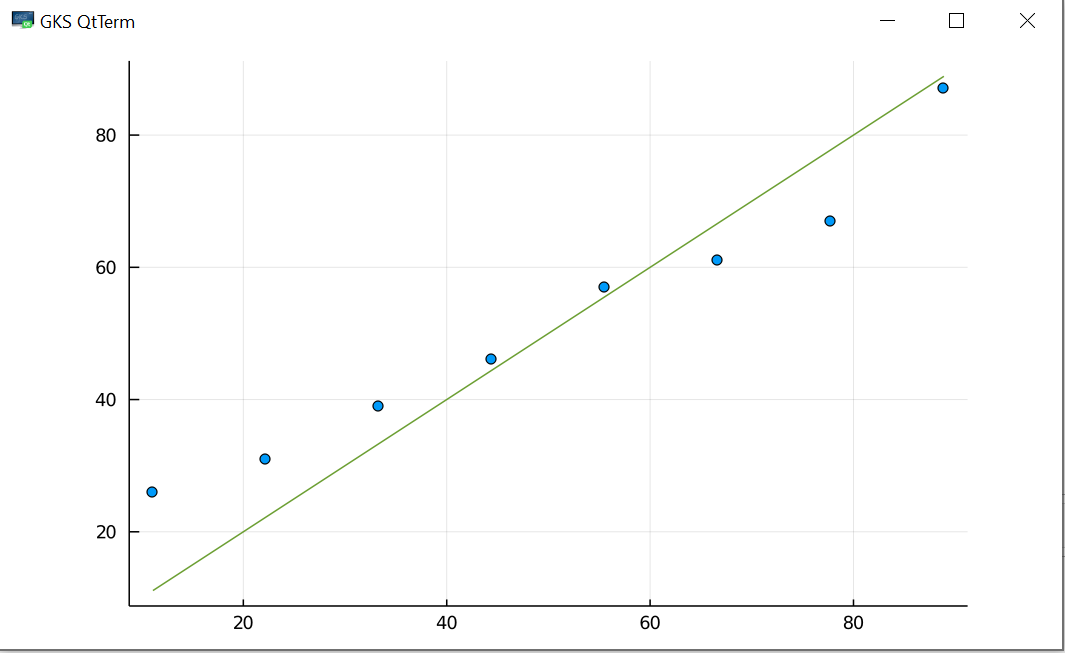

In [16]:
display.Image("plot.PNG")

Based on the notes. What I need to do is on the lines for chi_stat = sum((counts - expected).^2 ./ expected). So I will try that. So, I am not sure what to do exactly, but what I did was take the values resulted from my shuf.jl and sorted them from least to greatest making that the counts. Then I made another list from 10-100 in intervals of ten to simulate the uniform values then computed the calculations for the chi_stat. So after doing so I got the value below. 

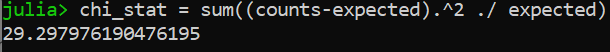

In [17]:
display.Image("chi_stat.PNG")

From a graphical view you can tell that the points from between 40 and 60 and at point x=90 are fairly close, but the others are far apart. I believe that is why we resulted in a high chi_stat value at 29.3. It's been a while since implemented null hypothesis, but if I were to state one it would be that there would be no difference between the reservoir sampling and the uniform distribution. However, after conducting some calculations we can see that with a chi_stat value of 29.3 we can turn towards the alternative hypothesis stating that there is a difference between the two.   

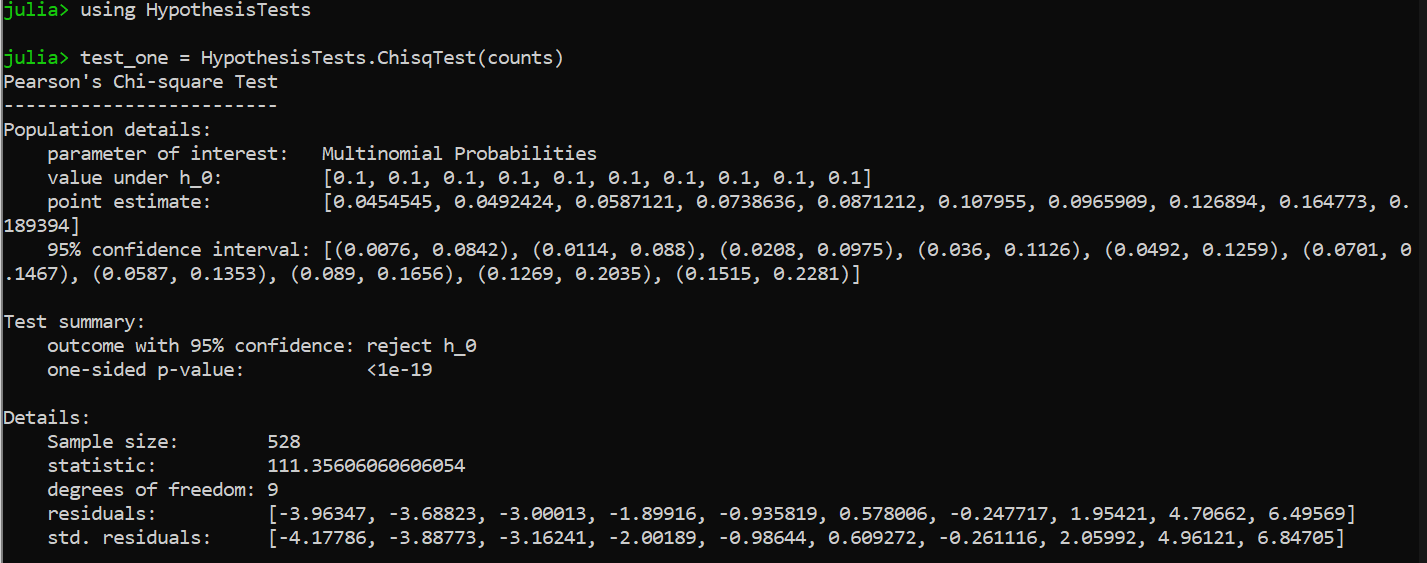

In [18]:
display.Image("hyp.PNG")

Another thing I tried was HypothesisTests. What I did was pass in the array resulting from my reservoir sampling and the above is the output. Here the statistic is a high 111.4 and the outcome with a 95% confidence results in rejecting the null hypothesis. 

**In conclusion, based on the visuals, tests, and values calculated, we can reject the null hypothesis and accept the alternative hypothesis that the reservoir sampling is different from an uniform distribution.**

### 4 - Extra Credit
(1 pt)

Minimal points, maximal glory.

Math option:
Prove that reservoir sampling produces simple random samples.

Programming option:
Wikipedia claims simple reservoir sampling is slow.
Is it?
Check by implementing another variation of reservoir sampling and comparing speeds.